# Geometric Brownian motion

In [1]:
import base

from data.gbm import GBM
import tensor_algebra as ta


## Define parameters

In [2]:
params = {
            "N":       1,
            "order":   7,
            "q0":      1.,
            "Lambda1": 1e-3,
            "Lambda2": 1e-4,
            "alpha1":  10.,
            "alpha2":  10.,
            "phi1":    0.,
            "phi2":    0.,
        }

## Estimate expected signature

In [3]:
drift = 0.005

process = GBM(drift1=drift, drift2=0)

Sample from the process and estimate expected signature from it.

In [4]:
n_paths = 50000

paths, ES_raw = process.build(n_paths=n_paths, order=params["order"])
ES = ta.sig_to_tensor(ES_raw, dim=3, order=params["order"])

## Solve optimisation problem

In [6]:
import optimiser

opt = optimiser.Optimiser(ES, dim=3, **params)
opt.train()


Done in 103.05181288719177 seconds. Maximum value: 1.0017845823481502


## Test on the *performance set*

In [ ]:
n_paths = 100

performance_set, _ = process.build(n_paths=100, order=1)

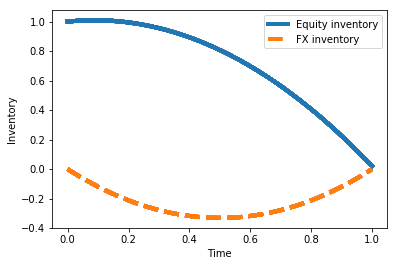

In [8]:
opt.plot_results(performance_set)